In [1]:
%matplotlib inline

In [2]:
# Linear Discriminant Analysis (LDA) attempts to fit a linear
# combination of features to predict the outcome variable.
# LDA is often used as a preprocessing step.

In [3]:
# Steps:
# 1. Grab stock data from Yahoo.
# 2. Rearrange it in a shape we're comfortable with.
# 3. Create an LDA object to fit and predict the class labels.
# 4. Give an example of using LDA for dimensionality reduction.

In [4]:
# This will perform analysis similar to Altman's Z-Score.
# Looking at a company's likelihood of defaulting within two years
# based on several financial metrics.

# From wikipedia:
#  T1: Working capital / Total Assets: Liquid assets compared to
#   company size.
#  T2: Retained Earnings / Total Assets: Profitability that
#   reflects the company's age and earnings power.
#  T3: Earnings Before Interest&Taxes / Total Assets: Operating
#   efficiency apart from tax and leveraging factors. It
#   recognizes operating earnings as being important to long-term
#   viability.
#  T4: Market Value of Equity / Book Value of total Liabilities:
#   Addes market dimension that can show up security price
#   fluctuation as a possible red flag.
#  T5: Sales/Total Assets: Standard measure for total asset
#   turnover.

In [5]:
tickers = ['F', 'TM', 'GM', 'TSLA']
from pandas.io import data as external_data

In [6]:
stock_panel = external_data.DataReader(tickers, 'yahoo')

In [7]:
stock_df = stock_panel.Close.dropna()

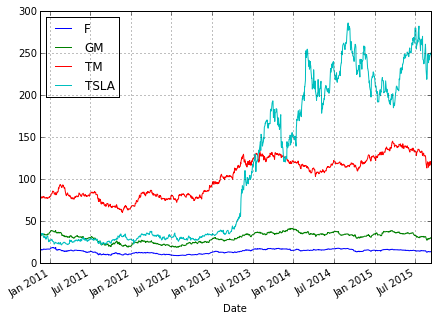

In [8]:
stock_df.plot(figsize=(7,5))

In [9]:
# now compare each stock price with its price in 6-months.
# If higher, code with 1, if not, code with 0.

In [23]:
classes = (stock_df.shift(-180) > stock_df).astype(int)
# flatten the dataset
X = stock_panel.to_frame()
classes = classes.unstack()
classes = classes.swaplevel(0, 1).sort_index()
classes = classes.to_frame()
classes.index.names = ['Date', 'minor']
data = X.join(classes).dropna()
data.rename(columns={0: 'is_higher'}, inplace=True)
data.head()

Open       High        Low      Close     Volume  \
Date       minor                                                          
2010-11-18 F      16.770000  16.870001  16.049999  16.120001  256937900   
           GM     35.000000  35.990002  33.889999  34.189999  457044300   
           TM     77.360001  77.510002  76.830002  77.290001     989100   
           TSLA   30.670000  30.740000  28.920000  29.889999     956100   
2010-11-19 F      16.020000  16.379999  15.830000  16.280001  130323600   

                  Adj Close  is_higher  
Date       minor                        
2010-11-18 F      14.495800          0  
           GM     32.023990          0  
           TM     77.290001          0  
           TSLA   29.889999          0  
2010-11-19 F      14.639679          0

In [25]:
import patsy

In [26]:
X = patsy.dmatrix('Open + High + Low + Close + Volume + \
                  is_higher - 1', data.reset_index(),
                  return_type='dataframe')

In [27]:
X.head()

,Open,High,Low,Close,Volume,is_higher
0,16.770000,16.870001,16.049999,16.120001,256937900,0
1,35.000000,35.990002,33.889999,34.189999,457044300,0
2,77.360001,77.510002,76.830002,77.290001,989100,0
3,30.670000,30.740000,28.920000,29.889999,956100,0
4,16.020000,16.379999,15.830000,16.280001,130323600,0


In [28]:
# Now that we have our dataset, fit the LDA object.

In [29]:
import pandas as pd
from sklearn.lda import LDA

In [30]:
lda = LDA()
lda.fit(X.ix[:, :-1], X.ix[:, -1])

LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
  store_covariance=False, tol=0.0001)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print classification_report(X.ix[:, -1].values,
                            lda.predict(X.ix[:, :-1]))

             precision    recall  f1-score   support

        0.0       0.60      0.53      0.56      2437
        1.0       0.57      0.64      0.60      2407

avg / total       0.58      0.58      0.58      4844



In [ ]:
# How it works:
# Lda is similar to clustering. It fits a basic model from data.
# Once it has a model, it attempts to predict and compare the
# likelihoods of the data given in each class.